# Experiment on uniform toy data from square

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import umap
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from vis_utils.utils import compute_low_dim_psims
import os
import pickle

In [2]:
fig_path = "../figures"
data_path = "../data/toy_uniform"

In [3]:
seed = 0
n = 1000
l = 1
alpha=0.5


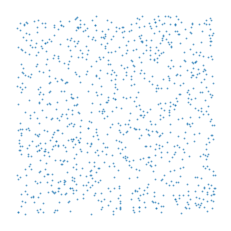

In [4]:
try:
    data = np.load(os.path.join(data_path, f"uniform_{n}_{l}_original_seed_{seed}.npy"))
except FileNotFoundError:
    np.random.seed(seed)
    data = np.random.uniform(0, l, size=(n, 2))
    np.save(os.path.join(data_path,
                         f"uniform_{n}_{l}_original_seed_{seed}.npy"),
            data)

fig_data = plt.figure()
plt.scatter(*data.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
fig_data.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_original_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [5]:
# get dense input graph
min_dist = 0.1
spread = 1.0
a, b= umap.umap_.find_ab_params(spread=spread, min_dist=min_dist)
low_sim = compute_low_dim_psims(data, a, b)
low_sim_sparse = coo_matrix(low_sim)


In [6]:
# Initialize UMAP at the input data
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_seed_{seed}.pkl"), "rb") as file:
        umapperns_init = pickle.load(file)
        embd_init = umapperns_init.embedding_
except FileNotFoundError:
    umapperns_init = umap.UMAP(init=data,
                                 random_state=seed)
    embd_init = umapperns_init.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init, file, pickle.HIGHEST_PROTOCOL)

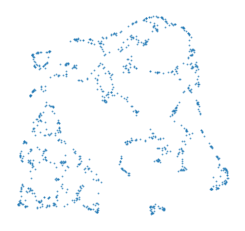

In [7]:
plt.scatter(*embd_init.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)


In [8]:
# Initialize at the input data and optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_10000 = pickle.load(file)
        embd_init_10000 = umapperns_init_10000.embedding_
except FileNotFoundError:
    umapperns_init_10000 = umap.UMAP(init=data,
                                       n_epochs=10000,
                                       random_state=seed,
                                       verbose=True)
    embd_init_10000 = umapperns_init_10000.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.scatter(*embd_init_10000.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_10000_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)


In [9]:
# Initialize at the input data and use dense input similarities
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph = pickle.load(file)
        embd_init_graph = umapperns_init_graph.embedding_
except FileNotFoundError:
    umapperns_init_graph = umap.UMAP(init=data,
                                       graph=low_sim_sparse,
                                       random_state=seed,
                                       verbose=True
                                       )
    embd_init_graph = umapperns_init_graph.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph, file, pickle.HIGHEST_PROTOCOL)



In [ ]:
plt.scatter(*embd_init_graph.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_graph_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [10]:
# Initialize at the input data, use dense inpute similarities and optimize for 10000 epochs
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000 = pickle.load(file)
        embd_init_graph_10000 = umapperns_init_graph_10000.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000 = umap.UMAP(init=data,
                                       graph=low_sim_sparse,
                                       n_epochs=10000,
                                       push_tail=False,
                                       random_state=seed,
                                       verbose=True
                                       )
    embd_init_graph_10000 = umapperns_init_graph_10000.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
plt.scatter(*embd_init_graph_10000.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_graph_10000_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

## Push tail of negative sample

In [11]:
# Initialize UMAP at the input data, optimize for 10000 epochs and push tail of neg sample
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_push_tail_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_10000_push_tail = pickle.load(file)
        embd_init_10000_push_tail = umapperns_init_10000_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_10000_push_tail = umap.UMAP(init=data,
                                                 n_epochs=10000,
                                                 push_tail=True,
                                                 random_state=seed,
                                                 verbose=True
                                                 )
    embd_init_10000_push_tail = umapperns_init_10000_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_10000_push_tail_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_10000_push_tail, file, pickle.HIGHEST_PROTOCOL)


In [ ]:
plt.scatter(*embd_init_10000_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_10000_push_tail_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [12]:
# Initialize UMAP at the input data, use dense input similarities, optimize for 10000 epochs and push tail of neg sample
try:
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_push_tail_seed_{seed}.pkl"), "rb") as file:
        umapperns_init_graph_10000_push_tail = pickle.load(file)
        embd_init_graph_10000_push_tail = umapperns_init_graph_10000_push_tail.embedding_
except FileNotFoundError:
    umapperns_init_graph_10000_push_tail = umap.UMAP(init=data,
                                                       graph=low_sim_sparse,
                                                       n_epochs=10000,
                                                       push_tail=True,
                                                       random_state=seed,
                                                       verbose=True
                                                       )
    embd_init_graph_10000_push_tail = umapperns_init_graph_10000_push_tail.fit_transform(data)
    with open(os.path.join(data_path, f"uniform_{n}_{l}_umapperns_init_graph_10000_push_tail_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_init_graph_10000_push_tail, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.scatter(*embd_init_graph_10000_push_tail.T, s=1, alpha = 0.5)
plt.gca().set_aspect("equal")
plt.axis('off')
plt.savefig(os.path.join(fig_path, f"toy_uniform_{n}_{l}_init_graph_10000_push_tail_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)
